In [1]:
%matplotlib inline
from sys import path
path.append("/Users/yangjunjie/work/bs-uhf/src/")

import numpy
import scipy
from numpy import load
import matplotlib as mpl
from matplotlib import pyplot as plt

from plot_utils import get_plot_data
from plot_utils import get_plot_style
from plot_utils import plot_data

(-0.01, 0.1)

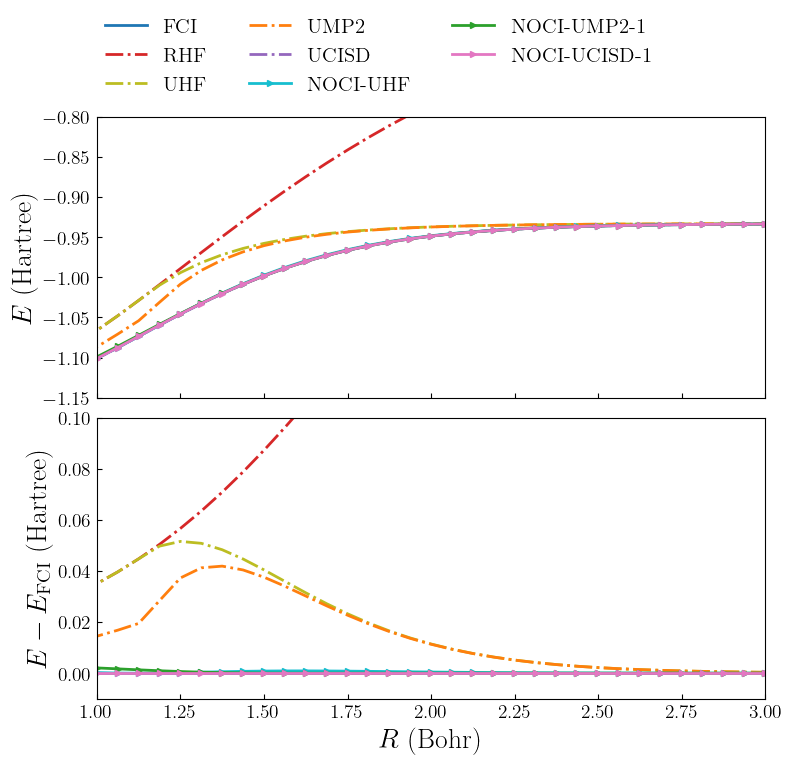

In [2]:
label_list = []
label_list.append("ene_fci")
label_list.append("ene_rhf")
label_list.append("ene_uhf")
label_list.append("ene_ump2")
label_list.append("ene_ucisd")
label_list.append("ene_noci_uhf")
label_list.append("ene_noci_ump2_1")
label_list.append("ene_noci_ucisd_1")

data_dict  = get_plot_data("../data/h2-sto-3g.h5")
style_dict = get_plot_style(label_list)
fig, axs   = plot_data(data_dict, style_dict, label_list)
axs[0].set_xlim(1.0, 3.0)
axs[0].set_ylim(-1.15, -0.8)
axs[1].set_ylim(-0.01, 0.1)

(-0.01, 0.1)

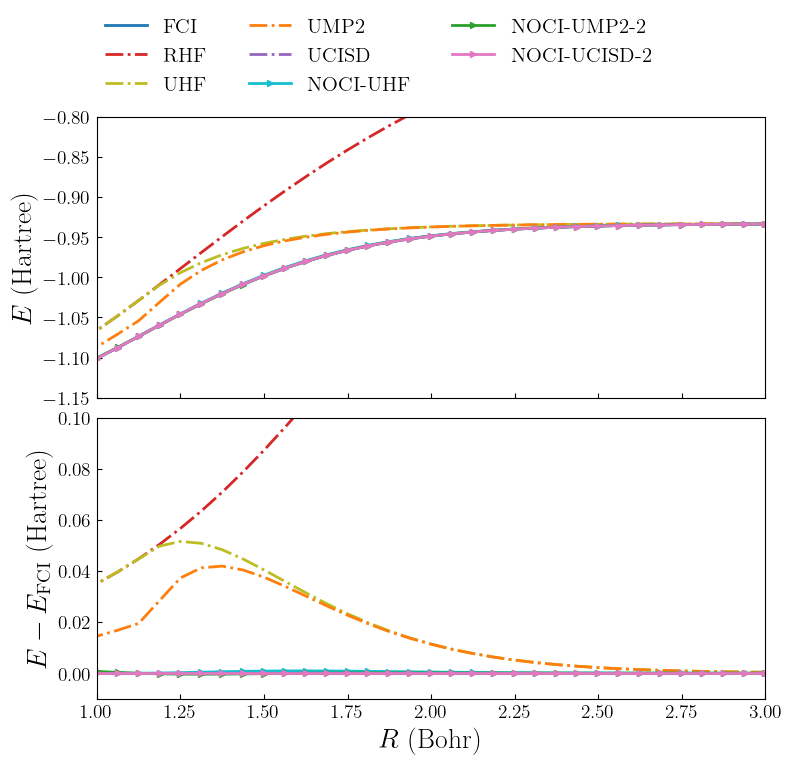

In [3]:
label_list = []
label_list.append("ene_fci")
label_list.append("ene_rhf")
label_list.append("ene_uhf")
label_list.append("ene_ump2")
label_list.append("ene_ucisd")
label_list.append("ene_noci_uhf")
label_list.append("ene_noci_ump2_2")
label_list.append("ene_noci_ucisd_2")
style_dict = get_plot_style(label_list)

data_dict  = get_plot_data("../data/h2-sto-3g.h5")
style_dict = get_plot_style(label_list)
fig, axs   = plot_data(data_dict, style_dict, label_list)
axs[0].set_xlim(1.0, 3.0)
axs[0].set_ylim(-1.15, -0.8)
axs[1].set_ylim(-0.01, 0.1)

In [4]:
data_dict = get_plot_data("../data/h2-sto-3g-scf.h5")

bond_length_list = data_dict["ene_uhf"][:, 0]
ene_nuc_list = data_dict["ene_nuc"][:, 1]

ene_uhf_list     = data_dict["ene_uhf"][:, 1]
ene_rhf_list     = data_dict["ene_rhf"][:, 1]
ene_fci_s_list  = data_dict["ene_fci"][:, 1]
ene_fci_t_list  = numpy.loadtxt("/Users/yangjunjie/work/h2-fci.log", delimiter=",", usecols=2)
ene_rmp2_list    = data_dict["ene_rmp2"][:, 1]
ene_ump2_list    = data_dict["ene_ump2"][:, 1]

ene_noci_uhf_list    = data_dict["ene_noci_uhf"][:, 1]
ene_noci_ump2_list_1 = data_dict["ene_noci_ump2_1"][:, 1]
ene_noci_ump2_list_2 = data_dict["ene_noci_ump2_2"][:, 1]

colors = ["fe4a49","2ab7ca","fed766","00cc66","8c5383"]
colors = ["#"+color for color in colors]

uhf_noci_dict = {
    "label": "NOCI-UHF",
    "color": colors[0], 
    "linestyle": "--", 
    "marker": "o", 
    "markersize": 4,
    "markevery": 2
}

ump2_noci_dict_1 = {
    "label": "NOCI-UMP2-1",
    "color": colors[1],
    "linestyle": "--",
    "marker": ">",
    "markersize": 4,
    "markevery": 2
}

ump2_noci_dict_2 = {
    "label": "NOCI-UMP2-2",
    "color": colors[3],
    "linestyle": "--",
    "marker": ">",
    "markersize": 4,
    "markevery": 2
}

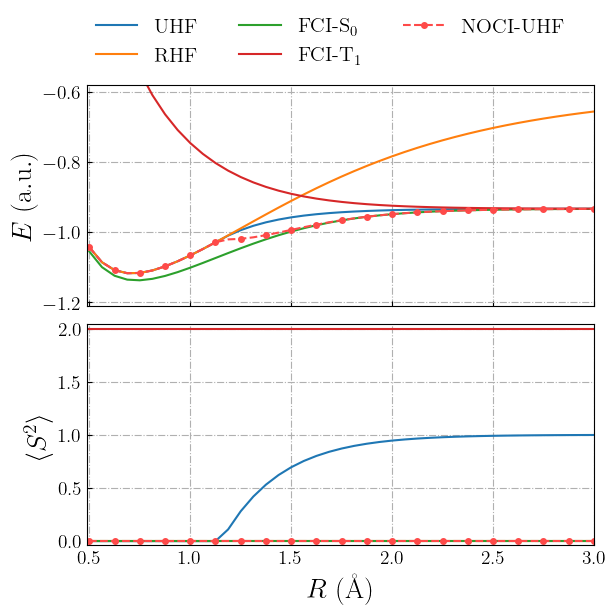

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(6.5, 6.5), sharex=True)

ax = axs[0]
ax.plot(bond_length_list, [ene_uhf + ene_nuc for ene_uhf, ene_nuc in zip(ene_uhf_list, ene_nuc_list)], label="UHF")
ax.plot(bond_length_list, [ene_rhf_s + ene_nuc for ene_rhf_s, ene_nuc in zip(ene_rhf_list, ene_nuc_list)], label="RHF")
ax.plot(bond_length_list, [ene_fci_s + ene_nuc for ene_fci_s, ene_nuc in zip(ene_fci_s_list, ene_nuc_list)], label=r"FCI-S$_0$")
ax.plot(bond_length_list, [ene_fci_t + ene_nuc for ene_fci_t, ene_nuc in zip(ene_fci_t_list, ene_nuc_list)], label=r"FCI-T$_1$")
ax.plot(bond_length_list, [ene_noci + ene_nuc for ene_noci, ene_nuc in zip(ene_noci_uhf_list, ene_nuc_list)], **uhf_noci_dict)
# ax.plot(bond_length_list, [ene_noci_ump2 + ene_nuc for ene_noci_ump2, ene_nuc in zip(ene_noci_ump2_list_1, ene_nuc_list)], label="NOCI-UMP2-1")
# ax.plot(bond_length_list, [ene_noci_ump2 + ene_nuc for ene_noci_ump2, ene_nuc in zip(ene_noci_ump2_list_2, ene_nuc_list)], label="NOCI-UMP2-2")
ax.set_ylim(-1.21, -0.58)

ax.set_ylabel(r"$E$ ($\mathrm{a.u.}$)")
ax.legend(
    loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
    edgecolor='silver', frameon=False, fontsize=15, ncol=3
    )
ax.grid(True, linestyle='-.')

ax = axs[1]
s2_uhf_list = data_dict["s2_uhf"][:, 1]
s2_rhf_list = data_dict["s2_rhf"][:, 1]

ax.plot(bond_length_list, s2_uhf_list, label="UHF")
ax.plot(bond_length_list, s2_rhf_list, label="RHF")
ax.plot(bond_length_list, s2_rhf_list, label="FCI-S$_0$")
ax.plot(bond_length_list, [2.0 for _ in bond_length_list], label=r"FCI-T$_1$")
ax.plot(bond_length_list, data_dict["s2_noci_uhf"][:, 1], **uhf_noci_dict)
# ax.plot(bond_length_list, data_dict["s2_noci_ump2_1"][:, 1], label=r"FCI-T$_1$")

# # ax.plot(bond_length_list, s2_rhf_t_list, label="RHF")
# ax.plot(bond_length_list, s2_fci_s_list, label="FCI")
# ax.plot(bond_length_list, s2_fci_t_list, label="FCI")

ax.set_xlim(0.49, 3.0)
ax.set_ylim(-0.04, 2.04)
ax.grid(True, linestyle='-.')

ax.set_ylabel(r"$\langle S^2 \rangle$")
ax.set_xlabel(r"$R$ ($\mathrm{\AA}$)")
fig.tight_layout(w_pad=0.4, h_pad=0.4)
fig.savefig("/Users/yangjunjie/Downloads/h2-bs-noci-uhf.png", dpi=600)

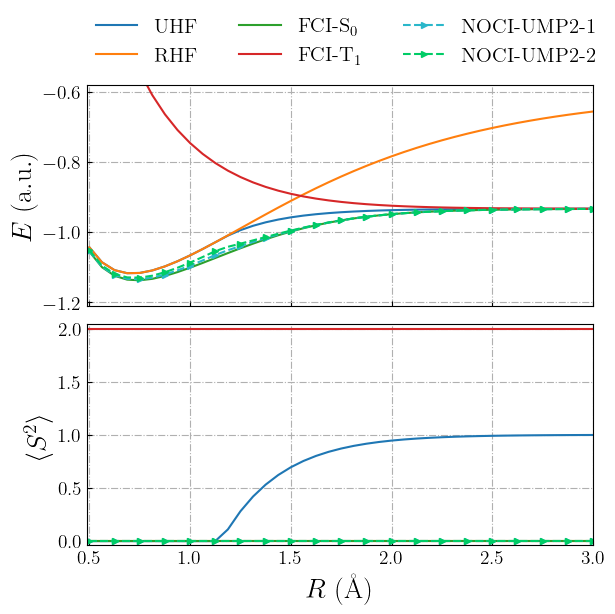

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(6.5, 6.5), sharex=True)

ax = axs[0]
ax.plot(bond_length_list, [ene_uhf + ene_nuc for ene_uhf, ene_nuc in zip(ene_uhf_list, ene_nuc_list)], label="UHF")
ax.plot(bond_length_list, [ene_rhf_s + ene_nuc for ene_rhf_s, ene_nuc in zip(ene_rhf_list, ene_nuc_list)], label="RHF")
ax.plot(bond_length_list, [ene_fci_s + ene_nuc for ene_fci_s, ene_nuc in zip(ene_fci_s_list, ene_nuc_list)], label=r"FCI-S$_0$")
ax.plot(bond_length_list, [ene_fci_t + ene_nuc for ene_fci_t, ene_nuc in zip(ene_fci_t_list, ene_nuc_list)], label=r"FCI-T$_1$")
ax.plot(bond_length_list, [ene_noci_ump2 + ene_nuc for ene_noci_ump2, ene_nuc in zip(ene_noci_ump2_list_1, ene_nuc_list)], **ump2_noci_dict_1)
ax.plot(bond_length_list, [ene_noci_ump2 + ene_nuc for ene_noci_ump2, ene_nuc in zip(ene_noci_ump2_list_2, ene_nuc_list)], **ump2_noci_dict_2)
ax.set_ylim(-1.21, -0.58)

ax.set_ylabel(r"$E$ ($\mathrm{a.u.}$)")
ax.legend(
    loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
    edgecolor='silver', frameon=False, fontsize=15, ncol=3
    )
ax.grid(True, linestyle='-.')

ax = axs[1]
s2_uhf_list = data_dict["s2_uhf"][:, 1]
s2_rhf_list = data_dict["s2_rhf"][:, 1]

ax.plot(bond_length_list, s2_uhf_list, label="UHF")
ax.plot(bond_length_list, s2_rhf_list, label="RHF")
ax.plot(bond_length_list, s2_rhf_list, label="FCI-S$_0$")
ax.plot(bond_length_list, [2.0 for _ in bond_length_list], label=r"FCI-T$_1$")
ax.plot(bond_length_list, data_dict["s2_noci_ump2_1"][:, 1], **ump2_noci_dict_1)
ax.plot(bond_length_list, data_dict["s2_noci_ump2_2"][:, 1], **ump2_noci_dict_2)

# # ax.plot(bond_length_list, s2_rhf_t_list, label="RHF")
# ax.plot(bond_length_list, s2_fci_s_list, label="FCI")
# ax.plot(bond_length_list, s2_fci_t_list, label="FCI")

ax.set_xlim(0.49, 3.0)
ax.set_ylim(-0.04, 2.04)
ax.grid(True, linestyle='-.')

ax.set_ylabel(r"$\langle S^2 \rangle$")
ax.set_xlabel(r"$R$ ($\mathrm{\AA}$)")
fig.tight_layout(w_pad=0.4, h_pad=0.4)
fig.savefig("/Users/yangjunjie/Downloads/h2-bs-noci-ump2.png", dpi=600)